### Problem Description

Exploratory Data Analysis on E-Commerce dataset and Regression model to predict revenue 

Dataset:https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx

## Packages

In [9]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale=1.3)

In [12]:
from sklearn.preprocessing import LabelBinarizer as lkb
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import scipy
from sklearn.linear_model import Ridge

### Read Dataset

In [13]:
df = pd.read_csv("/Users/hadyelhossary/Downloads/Nawah/Practical-DS-Session-main/E-Commerce/Online_Retail1.csv", encoding="ISO-8859-1", dtype={'CustomerID': str}, parse_dates=['InvoiceDate'])
df.shape

(541909, 8)

In [14]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object

In [15]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


## EDA

In [16]:
missing_percentage = df.isna().sum() * 100 / len(df)
missing_percentage

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [17]:
# Removing None Customer IDs ... save clean dataframe with same variable `df`
## Write your code here
df = df[~df.CustomerID.isnull()]

In [18]:
# Just for Checking 
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [19]:
df.shape

(406829, 8)

### Q1: Which Country makes the most transactions?

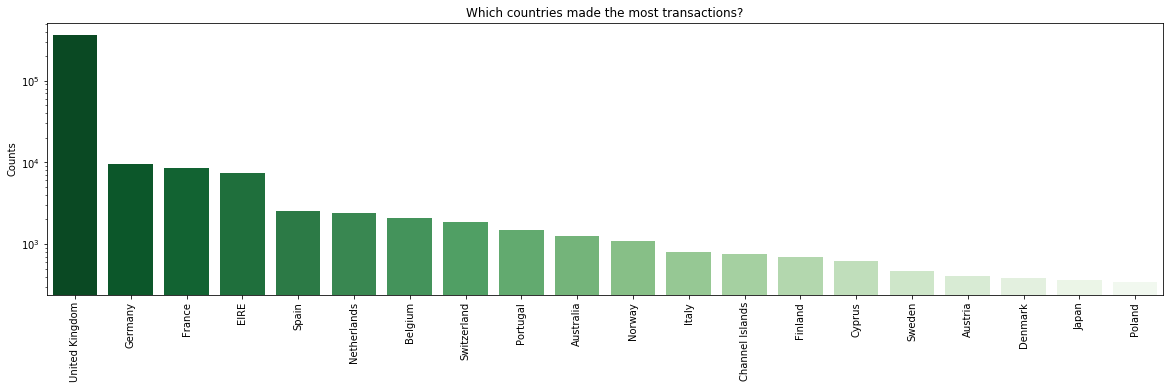

/opt/anaconda3/envs/e-commerce-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


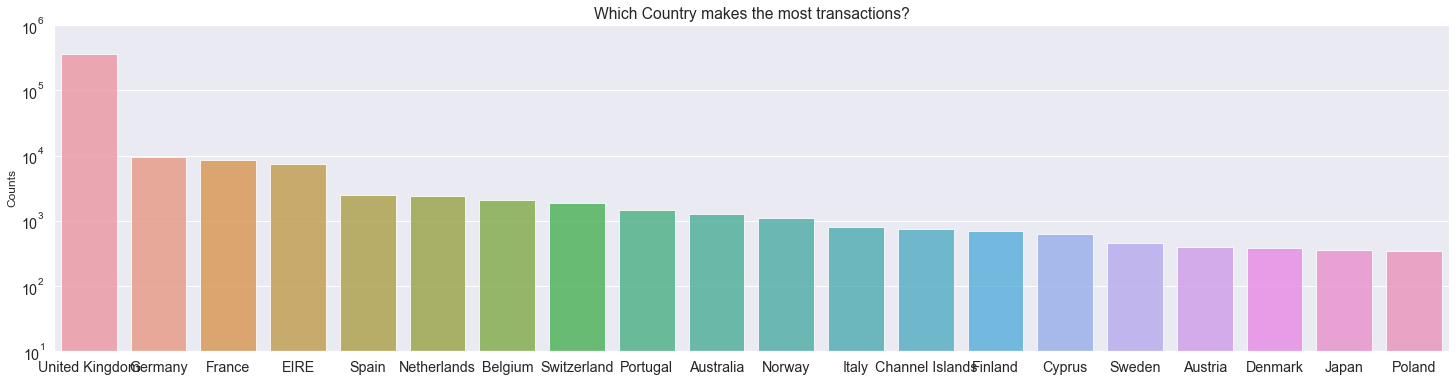

In [20]:
country_count  = df['Country'].value_counts()
country_count = country_count[:20,]
country_count
plt.figure(figsize=(25,6))
ax = sns.barplot(country_count.index, country_count.values, alpha=0.8)
plt.title('Which Country makes the most transactions?')
plt.ylabel('Counts', fontsize=12)
plt.ylim(10**1,10**6)
ax.set_yscale('log')
plt.show()

### Q2: Show the Top 10 Customers how made the largest Revenue
### Q6: Calculate the Total Revenue for each Row

In [15]:
df['Revenue'] = ... ## Write your code here
df_top_10 = ... ## Write your code here
df_top_10

,CustomerID,Revenue
0,14646,279489.02
1,18102,256438.49
2,17450,187482.17
3,14911,132572.62
4,12415,123725.45
5,14156,113384.14
6,17511,88125.38
7,16684,65892.08
8,13694,62653.10
9,15311,59419.34


In [21]:
df['Revenue'] = df.Quantity * df.UnitPrice
df_top_10 = df.groupby(['CustomerID'])['Revenue'].agg('sum').sort_values(ascending=False).to_frame()
df_top_10.reset_index(level=0, inplace=True)
df_top_10.head(10)

,CustomerID,Revenue
0,14646,279489.02
1,18102,256438.49
2,17450,187482.17
3,14911,132572.62
4,12415,123725.45
5,14156,113384.14
6,17511,88125.38
7,16684,65892.08
8,13694,62653.10
9,15311,59419.34


### Q3: Show Top 5 frequent Customers

In [14]:
df_top_cust = ... ## Write your code here
df_top_cust

,CustomerID,Frequency
0,17841,7983
1,14911,5903
2,14096,5128
3,12748,4642
4,14606,2782


In [22]:
df_top_cust = df.CustomerID.value_counts().to_frame()
df_top_cust.reset_index(level=0, inplace=True)
df_top_cust = df_top_cust.rename(columns={"index": "CustomerID", "CustomerID": "Frequency"})
df_top_cust.head()

,CustomerID,Frequency
0,17841,7983
1,14911,5903
2,14096,5128
3,12748,4642
4,14606,2782


In [23]:
f"{df.shape[0]:,}"

'406,829'

### Q4: Create a histogram that reveals the count of words of 𝑫𝒆𝒔𝒄𝒓𝒊𝒑𝒕𝒊𝒐𝒏

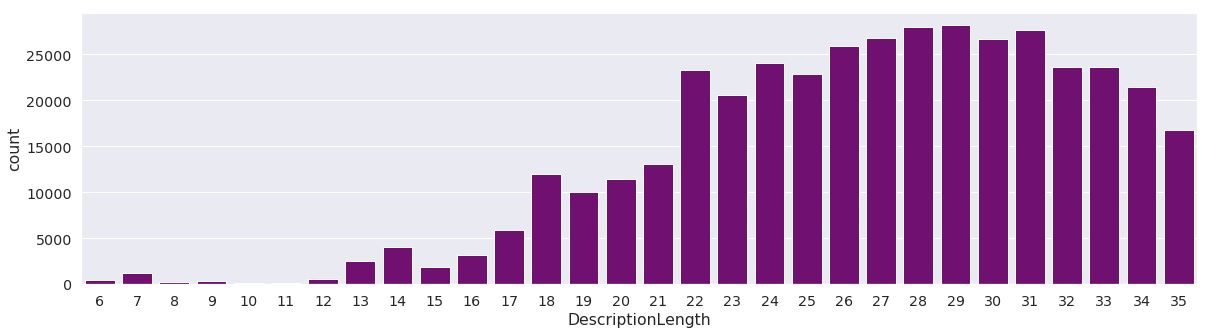

In [28]:
... #Write your Code here

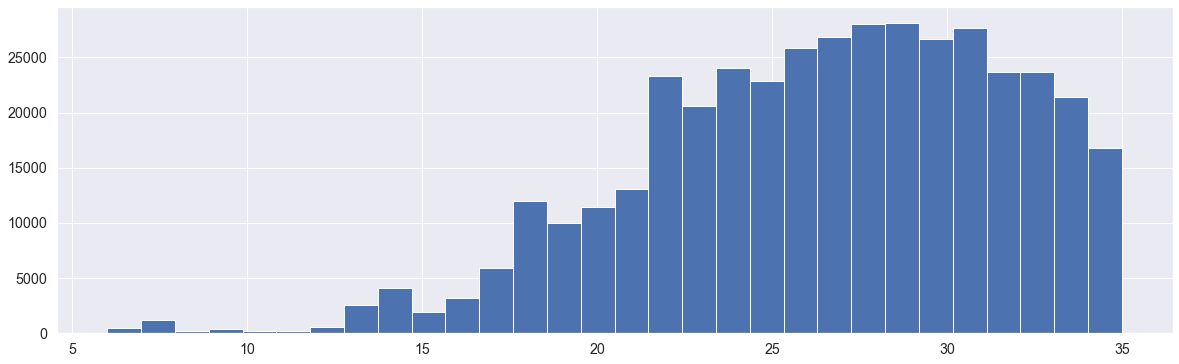

In [24]:
# Histogram for the length of the Description string
al = df['Description'].apply(lambda x: len(x))
plt.figure(figsize=(20,6))
plt.hist(al, bins=30)
plt.show()

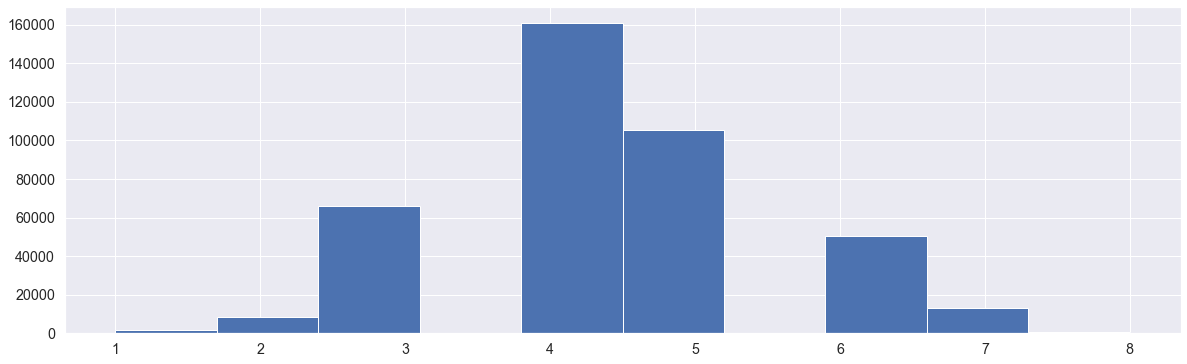

In [25]:
# Histogram for the count of words in the Description string
a = df['Description'].apply(lambda x: x.split())
al = a.apply(lambda x: len(x))
plt.figure(figsize=(20,6))
plt.hist(al)
plt.show()

### Q5: Extract {𝑌𝑒𝑎𝑟, 𝑀𝑜𝑛𝑡ℎ, 𝑊𝑒𝑒𝑘, 𝑊𝑒𝑒𝑘𝐷𝑎𝑦, 𝐷𝑎𝑦, 𝐷𝑎𝑦𝑂𝑓𝑌𝑒𝑎𝑟,𝐷𝑎𝑡𝑒} features from 𝐼𝑛𝑣𝑜𝑖𝑐𝑒𝐷𝑎𝑡𝑒 feature
P.S: Date is based on Year, Month & Day features

In [17]:
df["Year"] = ... ## Write your code here
df["Quarter"] = ... ## Write your code here
df["Month"] = ... ## Write your code here
df["Week"] = ... ## Write your code here
df["Weekday"] = ... ## Write your code here
df["Day"] = ... ## Write your code here
df["Dayofyear"] = ... ## Write your code here
df["Date"] = ... ## Write your code here

In [26]:
y = pd.DatetimeIndex(df['InvoiceDate'])
df["Year"] = y.year
df["Quarter"] = y.quarter
df["Month"] = y.month
df["Week"] = y.week
df["Weekday"] = y.weekday
df["Day"] = y.day
df["Dayofyear"] = y.dayofyear
df["Date"] = y.date

/Users/hadyelhossary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """


In [27]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Year,Quarter,Month,Week,Weekday,Day,Dayofyear,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,4,12,48,2,1,335,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,4,12,48,2,1,335,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,4,12,48,2,1,335,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,4,12,48,2,1,335,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,4,12,48,2,1,335,2010-12-01


### Q7 & Q8: Aggregate Revenue & Quantity across the grouped_features

In [33]:
grouped_features = [...]

In [34]:
... ## Write your code here


,Date,Year,Quarter,Month,Week,Weekday,Dayofyear,Day,StockCode,Quantity,Revenue
0,2010-12-01,2010,4,12,48,2,335,1,10002,60,51.00
1,2010-12-01,2010,4,12,48,2,335,1,10125,2,1.70
2,2010-12-01,2010,4,12,48,2,335,1,10133,5,4.25
3,2010-12-01,2010,4,12,48,2,335,1,15044B,1,2.95
4,2010-12-01,2010,4,12,48,2,335,1,15056BL,20,113.00


In [28]:
GP = df.groupby(['Date','Year','Quarter','Month', 'Week','Weekday','Dayofyear','Day','StockCode'])['Quantity','Revenue'].agg('sum')
GP.head()

/Users/hadyelhossary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Quantity  \
Date       Year Quarter Month Week Weekday Dayofyear Day StockCode             
2010-12-01 2010 4       12    48   2       335       1   10002            60   
                                                         10125             2   
                                                         10133             5   
                                                         15044B            1   
                                                         15056BL          20   

                                                                    Revenue  
Date       Year Quarter Month Week Weekday Dayofyear Day StockCode           
2010-12-01 2010 4       12    48   2       335       1   10002        51.00  
                                                         10125         1.70  
                                                         10133         4.25  
                                                         15044B        2.95  
                                                         15056BL     113.00

## (Optional Part)
#### You Can go on with the Modelling part using any type of 
  - ML model 
  - features pre-processing 
  - Loss function

as mentioned in the Questions

### Modelling

In [29]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Revenue', 'Year', 'Quarter',
       'Month', 'Week', 'Weekday', 'Day', 'Dayofyear', 'Date'],
      dtype='object')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
 8   Revenue      406829 non-null  float64       
 9   Year         406829 non-null  int64         
 10  Quarter      406829 non-null  int64         
 11  Month        406829 non-null  int64         
 12  Week         406829 non-null  int64         
 13  Weekday      406829 non-null  int64         
 14  Day          406829 non-null  int64         
 15  Dayofyear    406829 non-null  int6

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
df['Revenue'] = df['Revenue'].astype(int)

In [84]:
X = df[['Quantity','UnitPrice', 'Year', 'Quarter','Month', 'Week', 'Weekday', 'Day', 'Dayofyear']]
y = df['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [85]:
reg = Ridge()
reg.fit(X_train, y_train)
pred = reg.predict(X_test)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, pred)

print(f"Model Accuracy = {round(r2*100,2)}%")

Model Accuracy = 88.93%


In [86]:
import pickle
model_name = 'E-Commerce_model.pk'
pickle.dump(reg, open(model_name, 'wb'))

# Great Job
### Now go through the Food Review Notebook